# Pandas 3
### Name
### Class
### Date

In [2]:
# Put in imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [3]:
def prob1():
    """
    Use a groupby object to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    
    # Read in data
    college_data = pd.read_csv("college.csv", index_col= 0)

    # Get only Private values
    types = college_data.groupby("Private")

    # Describe S.F. Ratio
    ans_1 = types["S.F.Ratio"].describe()
    array1 = ans_1.values[0]
    
    # Describe Top 10 Percent 
    ans_2 = types["Top10perc"].describe()
    array2 = ans_2.values[1]
    
    # Describe Top 25 Percent
    ans_3 = types["Top25perc"].describe()
    array3 = ans_3.values[1]

    return (array1, array2, array3)
    

In [4]:
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

In [5]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    # Read in data
    college_data = pd.read_csv("college.csv", index_col= 0)

    # Separate into Private and Public Universities
    types = college_data.groupby("Private")

    # Make a boxplot for the data
    college_data.boxplot(["Apps", "Accept", "Enroll"], by = "Private", grid = False)
    plt.tight_layout()
    plt.figure(figsize = (15,30))

    # Make visualization for private room and board
    types.get_group("Yes").plot(kind = "hist", y = "Room.Board", legend = "False", title = "Private University Room and Board" )
    plt.xlabel("Room and Board Cost")

    # Make visualization for public room and board
    types.get_group("No").plot(kind = "hist", y = "Room.Board", legend = "False", title = "Public University Room and Board" )
    plt.xlabel("Room and Board Cost")
    

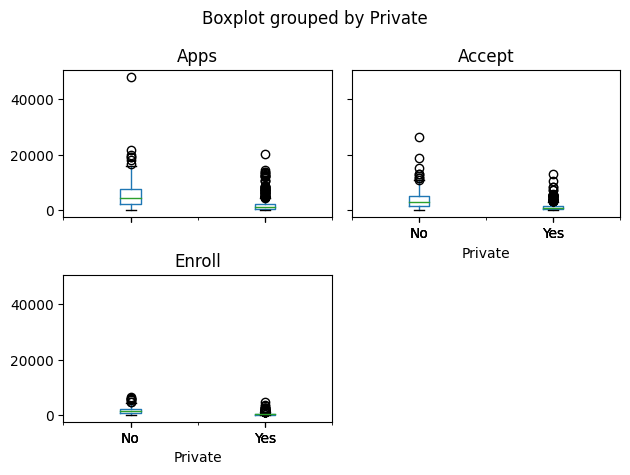

<Figure size 1500x3000 with 0 Axes>

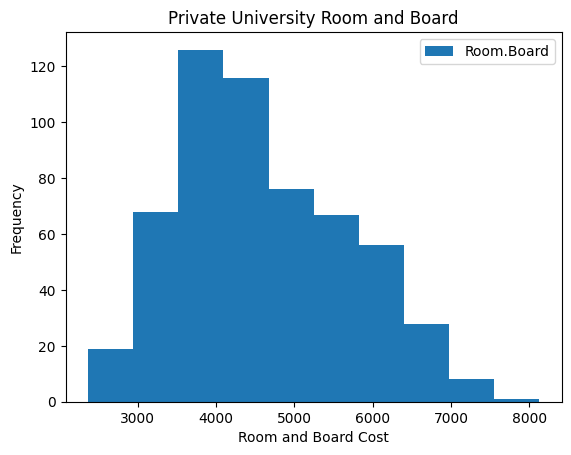

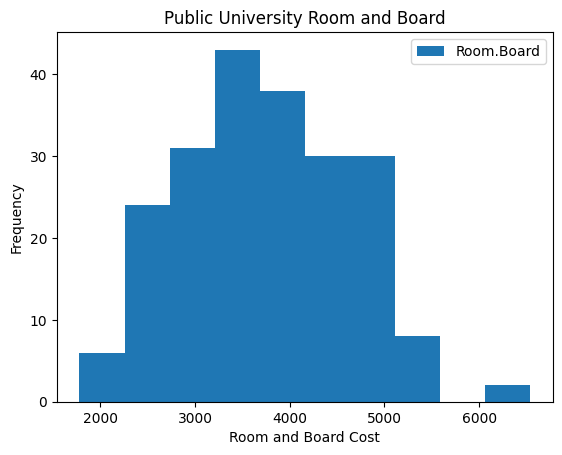

In [6]:
prob2()

# Problem 3

In [7]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination has the highest Usual Weekly 
            Earnings in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week 
            per person?
    Note: Hard coding is okay as long as there is code that makes sense for each problem.
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    
    # Read in data
    ohio_data = pd.read_csv("Ohio_1999.csv")
    
    # Make pivot tables
    #print(ohio_data.pivot_table(values = "Usual Weekly Earnings", index = "Race", columns = "Sex", aggfunc = "sum"))
    #print(ohio_data.pivot_table(values = "Usual Hours Worked", index = "Race", columns = "Sex", aggfunc = "sum" ))
    #print(ohio_data.pivot_table(values = "Usual Hours Worked", index = "Race", columns = "Sex"))


    # Answers
    tuple1 = (1,1)
    tuple2 = (3,2)
    tuple3 = (3,1)

    # Return Answers
    return tuple1, tuple2, tuple3


In [8]:
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [9]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    
    # Read in data
    ohio_data = pd.read_csv("Ohio_1999.csv")

    # Cut data into different Educational Attainment levels
    interval = pd.cut(ohio_data['Educational Attainment'], [0,38,42,46])

    # Cut data into different Age levels
    age_interval = pd.qcut(ohio_data["Age"], 6)

    # Get Answers
    ans_1 = (38,42)
    ans_2 = (40.0, 46.0)
    ans_3 = ((15.999, 29.0), (0,38))
    
    # Return answers
    return ans_1, ans_2, ans_3

In [10]:
prob4()

((38, 42), (40.0, 46.0), ((15.999, 29.0), (0, 38)))

# Problem 5

In [27]:
def prob5():
    """
    Use College.csv to answer the following questions:
        1. Is there a partition in which the number of both 
           private and public universities does not increase 
           as the percentage of alumni that donates increases?
        2. Is the partition with the greatest number of schools 
           the same for private and public universities?
        3. Is it true that the partition that has the least 
           number of students from the top 10 percent of their 
           high school class that were admitted on average is 
           the same for both private and public universities?
        4. The average percentage of students admitted from the 
           top 10 percent of their high school class is very high
           in private universities with very low acceptance rates. 
           Why is this not a good conclusion to draw solely from 
           this dataset? Use only the data to explain why; do not 
           extrapolate.

    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    
    # Read in college data
    college_data = pd.read_csv("college.csv")

    # Group by private and public universities
    types = college_data.groupby("Private")
    
    # Sort by public and private universities
    types.get_group("Yes").plot(kind = "scatter", x = 'perc.alumni', y = 'Expend', title = "Private Universities")
    types.get_group("No").plot(kind = "scatter", x = 'perc.alumni', y = 'Expend', title = "Public Universities")


    # Cut by alumni interval
    alumni_interval = pd.cut(college_data['perc.alumni'], [0,20,40,60,80,100])
   #  print(alumni_interval)
    
   # Cut by alumni interval
    alumni_interval = pd.cut(college_data['perc.alumni'], [0, 20, 40, 60, 80, 100])
   #  print(alumni_interval)

   # Count the number of universities in each alumni interval level for private and public universities
    private_counts = college_data.groupby(alumni_interval)['Private'].count()
    public_counts = college_data.groupby(alumni_interval)['Private'].count()

   #  print("Hello World")
   #  print("Private Universities:")
   #  print(private_counts)

   #  print("Public Universities:")
   #  print(public_counts)
   
   
    # Part 2

    #print("Private")
    #print(types.get_group("Yes").pivot_table(values = "Grad.Rate", index = grad_interval, aggfunc = 'count'))

    #print(" ")
    #print("Public")
    #print(types.get_group("No").pivot_table(values = "Grad.Rate", index = grad_interval, aggfunc = 'count'))


    # Part 3

    # Create a column that gives the acceptance rate of each university
    college_data['acceptance'] = college_data['Accept']/college_data['Apps']
    

    # Plot by different groups
    types.get_group("Yes").plot(kind = "scatter", x = 'acceptance', y = 'Top10perc', title = "Private Universities")
    types.get_group("No").plot(kind = "scatter", x = 'acceptance', y = 'Top10perc', title = "Public Universities")
    
    # Part 4
    string_answer = "There is not enough data to make such a conclusion"
    
   
    ans_1 = True
    ans_2 = False
    ans_3 = True
    ans_4 = string_answer
    
    return ans_1, ans_2, ans_3, ans_4

   

(True, False, True, 'There is not enough data to make such a conclusion')

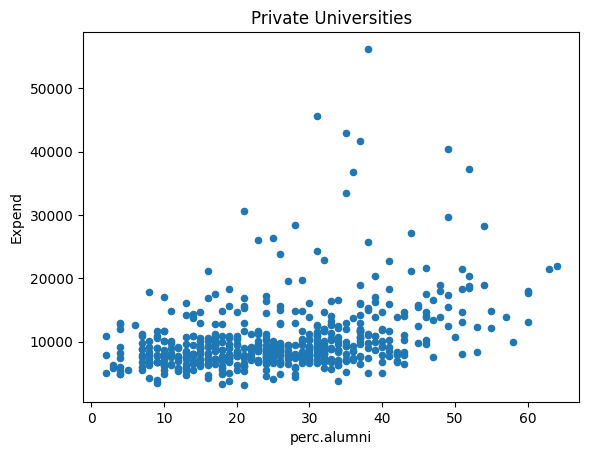

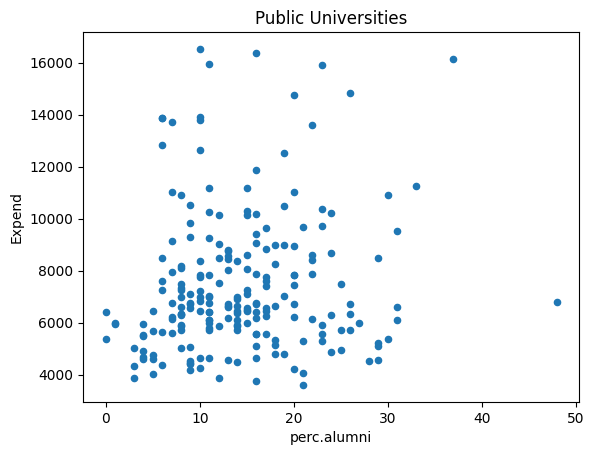

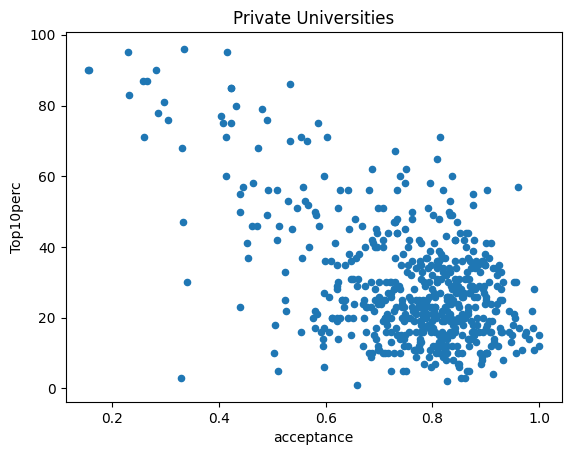

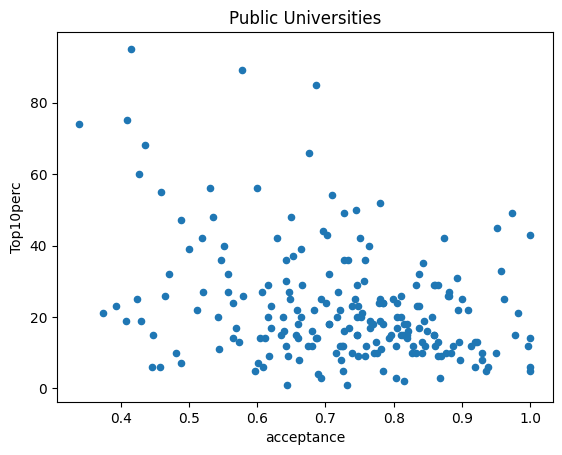

In [28]:
prob5()